In [79]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Importing Dataset

In [2]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")
sp500.to_csv("sp500.csv")

In [3]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-07-10 00:00:00-04:00,4394.229980,4412.600098,4389.919922,4409.529785,3429600000,0.0,0.0
2023-07-11 00:00:00-04:00,4415.549805,4443.640137,4408.459961,4439.259766,3624220000,0.0,0.0
2023-07-12 00:00:00-04:00,4467.689941,4488.339844,4463.229980,4472.160156,3920290000,0.0,0.0


In [4]:
sp500.drop(columns=['Dividends', 'Stock Splits'], inplace=True)

In [5]:
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2023-07-10 00:00:00-04:00,4394.229980,4412.600098,4389.919922,4409.529785,3429600000
2023-07-11 00:00:00-04:00,4415.549805,4443.640137,4408.459961,4439.259766,3624220000
2023-07-12 00:00:00-04:00,4467.689941,4488.339844,4463.229980,4472.160156,3920290000


In [6]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23998 entries, 1927-12-30 00:00:00-05:00 to 2023-07-14 00:00:00-04:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    23998 non-null  float64
 1   High    23998 non-null  float64
 2   Low     23998 non-null  float64
 3   Close   23998 non-null  float64
 4   Volume  23998 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 1.1 MB


## Visualising Stock Trends

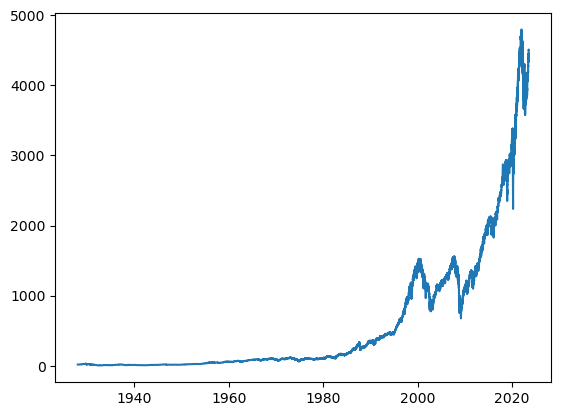

In [7]:
plt.plot(sp500.index, sp500.Close)

**Creating Target variable**

In [8]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [9]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-07-10 00:00:00-04:00,4394.229980,4412.600098,4389.919922,4409.529785,3429600000,4439.259766
2023-07-11 00:00:00-04:00,4415.549805,4443.640137,4408.459961,4439.259766,3624220000,4472.160156
2023-07-12 00:00:00-04:00,4467.689941,4488.339844,4463.229980,4472.160156,3920290000,4510.040039


In [10]:
sp500["Target"] = (sp500.Tomorrow > sp500.Close).astype(int)

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-07-10 00:00:00-04:00,4394.229980,4412.600098,4389.919922,4409.529785,3429600000,4439.259766,1
2023-07-11 00:00:00-04:00,4415.549805,4443.640137,4408.459961,4439.259766,3624220000,4472.160156,1
2023-07-12 00:00:00-04:00,4467.689941,4488.339844,4463.229980,4472.160156,3920290000,4510.040039,1


In [14]:
type(sp500.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [37]:
sp500.index = sp500.index.tz_convert(None)

In [23]:
import datetime

In [39]:
date_before = datetime.datetime(1990, 1, 1)

In [40]:
date_before

datetime.datetime(1990, 1, 1, 0, 0)

In [42]:
df = sp500[sp500.index > date_before]
df.shape

(8448, 7)

In [65]:
df = df.dropna()

## Building Model

In [66]:
date_after = datetime.datetime(2022, 1, 1)

In [87]:
train = df[df.index < date_after]
test = df[df.index >= date_after]

In [88]:
train[train.Target == 1].shape, train[train.Target == 0].shape

((4336, 7), (3728, 7))

In [86]:
train.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Tomorrow', 'Target'], dtype='object')

In [89]:
X_train = train.drop(columns=['Target', 'Tomorrow'])
y_train = train.Target

In [90]:
X_test = test.drop(columns=['Target', 'Tomorrow'])
y_test = test.Target

In [91]:
X_train.shape, X_test.shape, y_test.shape

((8064, 5), (383, 5), (383,))

In [97]:
clf = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=4)

In [98]:
clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=50, random_state=4)

In [99]:
y_pred = clf.predict(X_test)

In [100]:
target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.45      0.19      0.26       205
         Yes       0.44      0.74      0.55       178

    accuracy                           0.44       383
   macro avg       0.44      0.46      0.41       383
weighted avg       0.44      0.44      0.40       383



<AxesSubplot:>

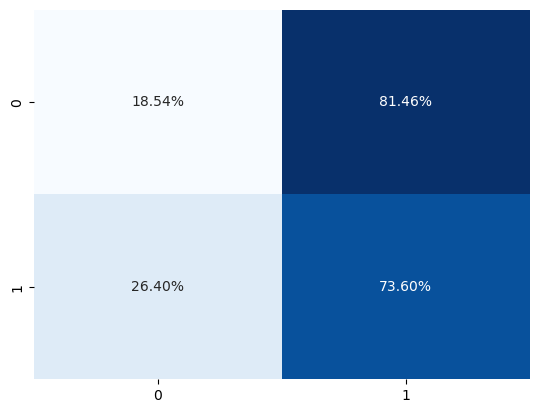

In [101]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(np.transpose(np.transpose(cf_matrix)/np.sum(cf_matrix, axis=1)), annot=True, 
            fmt='.2%', cmap='Blues', cbar=False)

In [102]:
cf_matrix

array([[ 38, 167],
       [ 47, 131]])

In [103]:
X_train.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [104]:
predictors = ['Open', 'High', 'Low', 'Close', 'Volume']

In [108]:
def predict(model, train, test, predictors):
    model.fit(train[predictors], train.Target)
    y_pred = model.predict(test[predictors])
    y_pred = pd.Series(y_pred, index = test.index, name="Predicted")
    combined = pd.concat([test.Target, y_pred], axis=1)
    return combined

In [109]:
clf = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=4)

In [110]:
predict(clf, train, test, predictors)

,Target,Predicted
Date,,
2022-01-03 05:00:00,0,0
2022-01-04 05:00:00,0,0
2022-01-05 05:00:00,0,0
2022-01-06 05:00:00,0,1
2022-01-07 05:00:00,0,1
...,...,...
2023-07-07 04:00:00,1,1
2023-07-10 04:00:00,1,0
2023-07-11 04:00:00,1,1


In [ ]:
def backtest(model, data, start=2500, step=250, predictors):
    all_predictions = []
    
    for i in range(start, len(data), step):
        pred = predict(model, data[:i], data[i:i+step], predictors)
        all_predictions.append(pred)
    return pd.concat(all_predictions, axis=1)
        